In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test= np.load("./chest_xray_data_rgb.npy", allow_pickle=True)

In [ ]:
resnet_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=X_train[0].shape,
    pooling=None
)
resnet_model.trainable = True

resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
for layer in resnet_model.layers[:-4]:
   layer.trainable = False

In [ ]:
x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
x = tf.keras.layers.Flatten()(resnet_model.output)
# x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(resnet_model.input, x)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_val, y_val))
results = model.evaluate(X_test, y_test)
print(results)

Epoch 1/15
82/82 [==============================] - 46s 510ms/step - loss: 3.8949 - accuracy: 0.9149 - val_loss: 0.2417 - val_accuracy: 0.9375
Epoch 2/15
82/82 [==============================] - 41s 499ms/step - loss: 0.0747 - accuracy: 0.9743 - val_loss: 0.2017 - val_accuracy: 0.8750
Epoch 3/15
82/82 [==============================] - 41s 499ms/step - loss: 0.0471 - accuracy: 0.9822 - val_loss: 0.1756 - val_accuracy: 0.9375
Epoch 4/15
82/82 [==============================] - 41s 500ms/step - loss: 0.0319 - accuracy: 0.9887 - val_loss: 0.1112 - val_accuracy: 0.9375
Epoch 5/15
82/82 [==============================] - 41s 499ms/step - loss: 0.0249 - accuracy: 0.9919 - val_loss: 0.1060 - val_accuracy: 0.8750
Epoch 6/15
82/82 [==============================] - 41s 499ms/step - loss: 0.0169 - accuracy: 0.9952 - val_loss: 0.1380 - val_accuracy: 0.9375
Epoch 7/15
82/82 [==============================] - 41s 499ms/step - loss: 0.0150 - accuracy: 0.9962 - val_loss: 0.2922 - val_accuracy: 0.8750

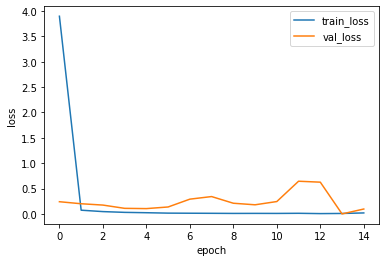

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

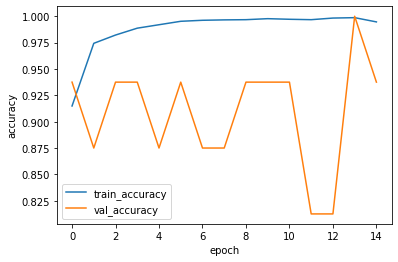

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred.reshape(624)
y_pred1 = np.zeros(624)
for i in range(len(y_pred)):
  if y_pred[i] > 0.5:
    y_pred1[i]=1


In [ ]:
y_pred1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
target_names = ['NORMAL', 'PNEUMONIA']
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1, target_names=target_names))

[[138  96]
 [  1 389]]
              precision    recall  f1-score   support

      NORMAL       0.99      0.59      0.74       234
   PNEUMONIA       0.80      1.00      0.89       390

    accuracy                           0.84       624
   macro avg       0.90      0.79      0.81       624
weighted avg       0.87      0.84      0.83       624

